# Introduction

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# Read data

In [2]:
sample_submission = pd.read_csv('sample_submission.csv')
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
sample = pd.read_csv("sample_submission.csv")

# Exploratory Data Analysis

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

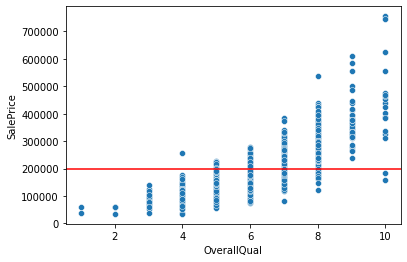

In [6]:
sns.scatterplot(data=train, x='OverallQual', y='SalePrice')
plt.axhline(y=200000,color='r')

In [7]:
train[(train['OverallQual']>8) &(train['SalePrice']<200000)][['SalePrice', 'OverallQual']]

,SalePrice,OverallQual
523,184750,10
1298,160000,10


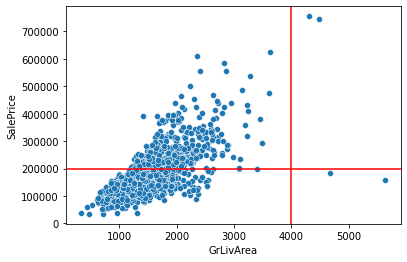

In [8]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)
plt.axhline(y=200000, color='r')
plt.axvline(x=4000, color='r')

In [9]:
train[(train['GrLivArea']>4000) & (train['SalePrice']<400000)][['SalePrice', 'GrLivArea']]

,SalePrice,GrLivArea
523,184750,4676
1298,160000,5642


In [10]:
index_drop=train[(train['GrLivArea']>4000) & (train['SalePrice']<400000)].index
train=train.drop(index_drop, axis=0)

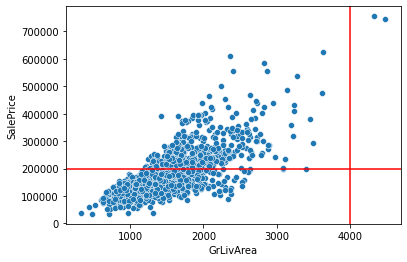

In [11]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)
plt.axhline(y=200000, color='r')
plt.axvline(x=4000, color='r')

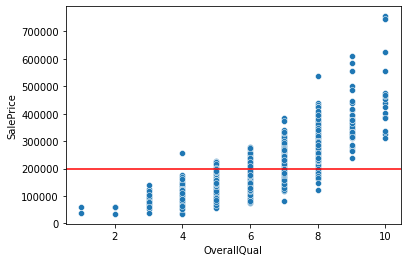

In [12]:
sns.scatterplot(x='OverallQual', y='SalePrice', data=train)
plt.axhline(y=200000,color='r')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

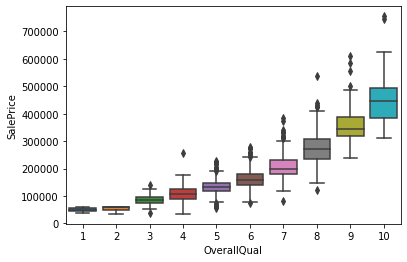

In [13]:
sns.boxplot(x='OverallQual', y='SalePrice', data=train)

In [14]:
train= train.drop('Id', axis=1)

# Dropping null data

In [15]:
train.isnull()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [16]:
#How many missing data is there in each features?
train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [17]:
#The percent of missing data in any feature:
100*(train.isnull().sum()/len(train))

MSSubClass        0.00000
MSZoning          0.00000
LotFrontage      17.76406
LotArea           0.00000
Street            0.00000
                   ...   
MoSold            0.00000
YrSold            0.00000
SaleType          0.00000
SaleCondition     0.00000
SalePrice         0.00000
Length: 80, dtype: float64

In [18]:
#Make a Function to calculate the percent of missing data in each columns (feature) and then sort it
def missing_percent(train):
    nan_percent= 100*(train.isnull().sum()/len(train))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [19]:
nan_percent= missing_percent(train)

In [20]:
nan_percent

Electrical       0.068587
MasVnrType       0.548697
MasVnrArea       0.548697
BsmtQual         2.537723
BsmtCond         2.537723
BsmtFinType1     2.537723
BsmtExposure     2.606310
BsmtFinType2     2.606310
GarageCond       5.555556
GarageQual       5.555556
GarageFinish     5.555556
GarageType       5.555556
GarageYrBlt      5.555556
LotFrontage     17.764060
FireplaceQu     47.325103
Fence           80.727023
Alley           93.758573
MiscFeature     96.296296
PoolQC          99.588477
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Electrical'),
  Text(1, 0, 'MasVnrType'),
  Text(2, 0, 'MasVnrArea'),
  Text(3, 0, 'BsmtQual'),
  Text(4, 0, 'BsmtCond'),
  Text(5, 0, 'BsmtFinType1'),
  Text(6, 0, 'BsmtExposure'),
  Text(7, 0, 'BsmtFinType2'),
  Text(8, 0, 'GarageCond'),
  Text(9, 0, 'GarageQual'),
  Text(10, 0, 'GarageFinish'),
  Text(11, 0, 'GarageType'),
  Text(12, 0, 'GarageYrBlt'),
  Text(13, 0, 'LotFrontage'),
  Text(14, 0, 'FireplaceQu'),
  Text(15, 0, 'Fence'),
  Text(16, 0, 'Alley'),
  Text(17, 0, 'MiscFeature'),
  Text(18, 0, 'PoolQC')])

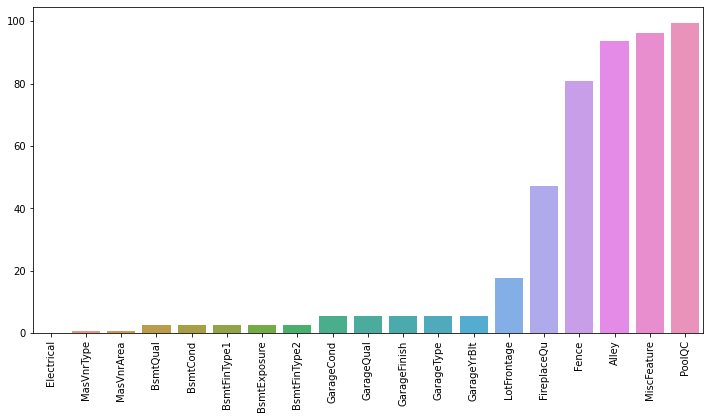

In [21]:
#plot the feature with missing indicating the percent of missing data
plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

(0.0, 1.0)

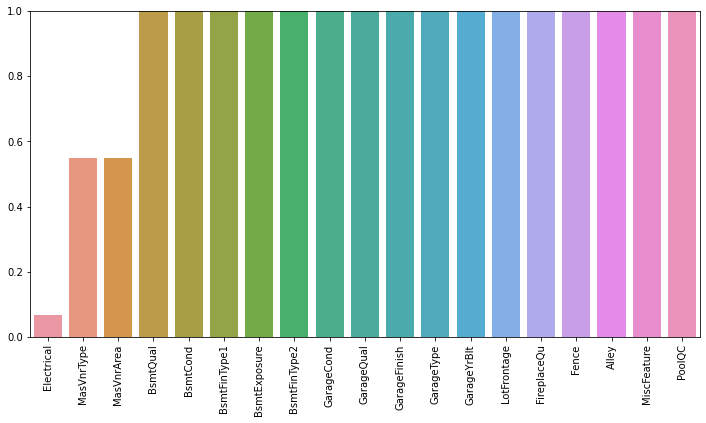

In [22]:
#every Feature with missing data must be checked!
#We choose a threshold of 1%. It means, if there is less than 1% of a feature are missing,
#then we will consider just dropping that rows

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

#Set 1% threshold:
plt.ylim(0,1)

In [23]:
nan_percent[nan_percent<1]

Electrical    0.068587
MasVnrType    0.548697
MasVnrArea    0.548697
dtype: float64

In [24]:
nan_percent[nan_percent<1].index

Index(['Electrical', 'MasVnrType', 'MasVnrArea'], dtype='object')

In [25]:
100/len(train)
#It shows that, Feature with just one missing rows has this percent value of missing data

0.06858710562414266

In [26]:
train[train['Electrical'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [27]:
train[train['GarageArea'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [28]:
train= train.dropna(axis=0, subset=['Electrical', 'GarageArea','MasVnrArea'])

(0.0, 1.0)

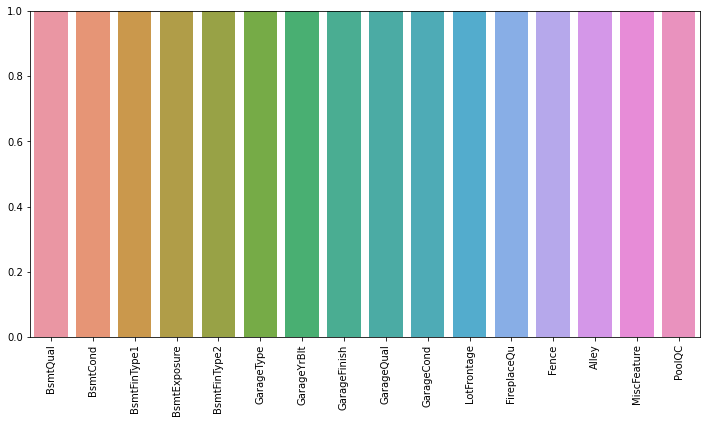

In [29]:
nan_percent= missing_percent(train)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [30]:
train[train['TotalBsmtSF'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [31]:
train[train['BsmtHalfBath'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [32]:
train[train['BsmtFullBath'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [33]:
#After checking the data documentation,
#it shows that missing value (two rows) in Basement Features are because of there is no basement in these rows
#Decision: Filling in data based on column: numerical basement & string descriptive:

#Numerical Columns fill with 0:
bsmt_num_cols= ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF' ,'BsmtFullBath', 'BsmtHalfBath']
train[bsmt_num_cols]=train[bsmt_num_cols].fillna(0)

#String Columns fill with None:
bsmt_str_cols= ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
train[bsmt_str_cols]= train[bsmt_str_cols].fillna('None')

(0.0, 1.0)

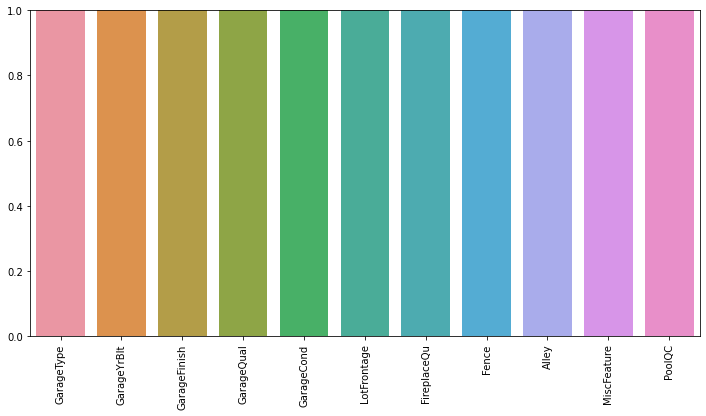

In [34]:
nan_percent= missing_percent(train)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [35]:
train["MasVnrType"]= train["MasVnrType"].fillna("None")
train["MasVnrArea"]= train["MasVnrArea"].fillna(0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'GarageType'),
  Text(1, 0, 'GarageYrBlt'),
  Text(2, 0, 'GarageFinish'),
  Text(3, 0, 'GarageQual'),
  Text(4, 0, 'GarageCond'),
  Text(5, 0, 'LotFrontage'),
  Text(6, 0, 'FireplaceQu'),
  Text(7, 0, 'Fence'),
  Text(8, 0, 'Alley'),
  Text(9, 0, 'MiscFeature'),
  Text(10, 0, 'PoolQC')])

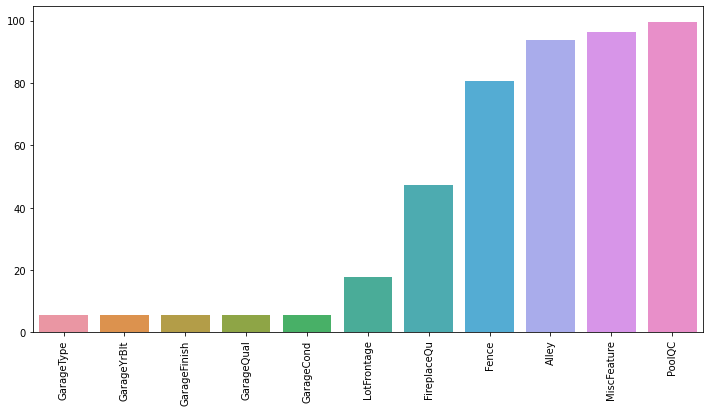

In [36]:
nan_percent= missing_percent(train)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [37]:
train[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,Attchd,2003.0,RFn,TA,TA
1,Attchd,1976.0,RFn,TA,TA
2,Attchd,2001.0,RFn,TA,TA
3,Detchd,1998.0,Unf,TA,TA
4,Attchd,2000.0,RFn,TA,TA
...,...,...,...,...,...
1455,Attchd,1999.0,RFn,TA,TA
1456,Attchd,1978.0,Unf,TA,TA
1457,Attchd,1941.0,RFn,TA,TA
1458,Attchd,1950.0,Unf,TA,TA


In [38]:
#Filling the missing Value:
Gar_str_cols= ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
train[Gar_str_cols]=train[Gar_str_cols].fillna('None')

train['GarageYrBlt']=train['GarageYrBlt'].fillna(0)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'LotFrontage'),
  Text(1, 0, 'FireplaceQu'),
  Text(2, 0, 'Fence'),
  Text(3, 0, 'Alley'),
  Text(4, 0, 'MiscFeature'),
  Text(5, 0, 'PoolQC')])

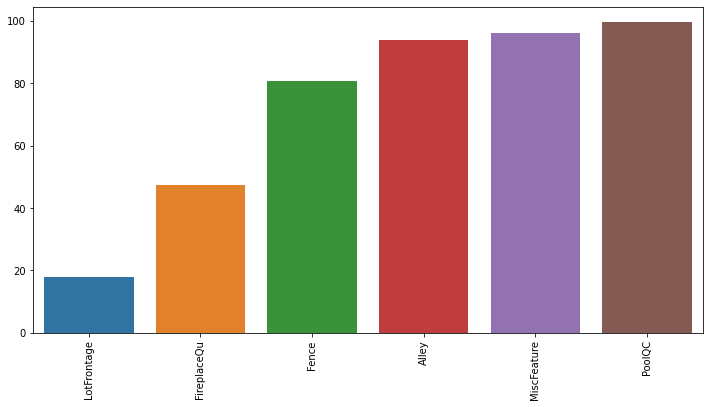

In [39]:
nan_percent= missing_percent(train)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [40]:
nan_percent.index

Index(['LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature',
       'PoolQC'],
      dtype='object')

In [41]:
train[['LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature',
       'PoolQC']]

,LotFrontage,FireplaceQu,Fence,Alley,MiscFeature,PoolQC
0,65.0,NaN,NaN,NaN,NaN,NaN
1,80.0,TA,NaN,NaN,NaN,NaN
2,68.0,TA,NaN,NaN,NaN,NaN
3,60.0,Gd,NaN,NaN,NaN,NaN
4,84.0,TA,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1455,62.0,TA,NaN,NaN,NaN,NaN
1456,85.0,TA,MnPrv,NaN,NaN,NaN
1457,66.0,Gd,GdPrv,NaN,Shed,NaN
1458,68.0,NaN,NaN,NaN,NaN,NaN


In [42]:
train= train.drop(['Fence', 'Alley', 'MiscFeature','PoolQC'], axis=1)

(array([0, 1]), [Text(0, 0, 'LotFrontage'), Text(1, 0, 'FireplaceQu')])

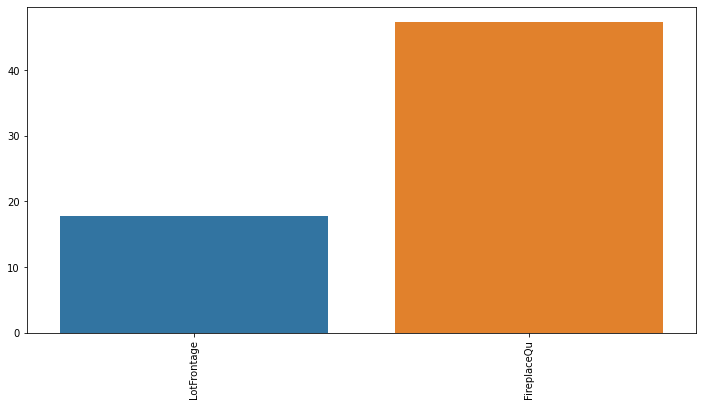

In [43]:
nan_percent= missing_percent(train)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [44]:
#Filling in Fireplace Quality based on dataset documentation:
train['FireplaceQu']= train['FireplaceQu'].fillna('None')

(array([0]), [Text(0, 0, 'LotFrontage')])

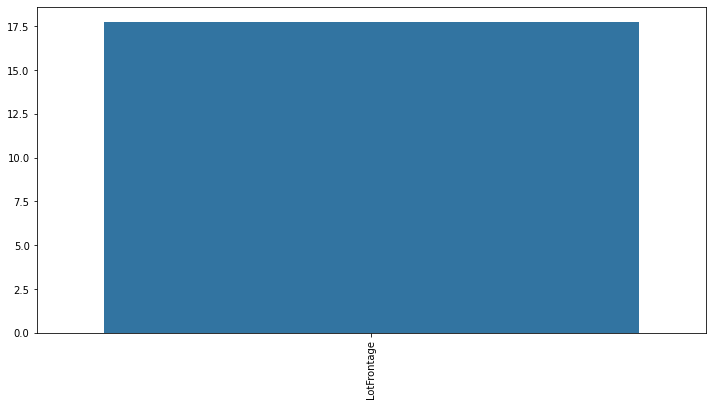

In [45]:
nan_percent= missing_percent(train)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [46]:
train['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

<AxesSubplot:xlabel='LotFrontage', ylabel='Neighborhood'>

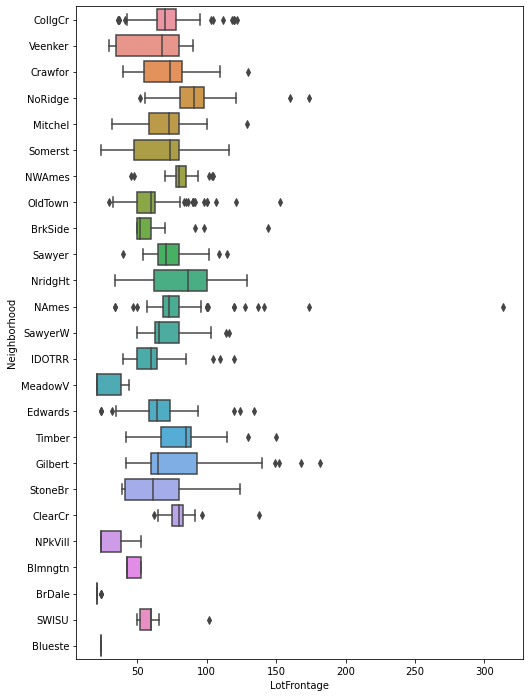

In [47]:
plt.figure(figsize=(8,12))
sns.boxplot(data=train, x='LotFrontage', y='Neighborhood')

In [48]:
#Impute missing data based on other columns:

train.groupby('Neighborhood')['LotFrontage']

In [49]:
train.groupby('Neighborhood')['LotFrontage'].mean()

Neighborhood
Blmngtn    47.142857
Blueste    24.000000
BrDale     21.562500
BrkSide    57.509804
ClearCr    83.461538
CollgCr    71.656000
Crawfor    71.804878
Edwards    64.811111
Gilbert    79.877551
IDOTRR     62.500000
MeadowV    27.800000
Mitchel    70.083333
NAmes      76.462366
NPkVill    32.285714
NWAmes     81.288889
NoRidge    91.878788
NridgHt    81.546667
OldTown    62.788991
SWISU      58.913043
Sawyer     74.437500
SawyerW    71.591837
Somerst    64.653333
StoneBr    62.700000
Timber     80.379310
Veenker    59.714286
Name: LotFrontage, dtype: float64

In [50]:
train.groupby('Neighborhood')['LotFrontage'].transform(lambda val: val.fillna(val.mean()))

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1449, dtype: float64

In [51]:
train['LotFrontage']=train.groupby('Neighborhood')['LotFrontage'].transform(lambda val: val.fillna(val.mean()))

In [52]:
train['LotFrontage']= train['LotFrontage'].fillna(0)

In [53]:
nan_percent= missing_percent(train)

In [54]:
nan_percent

Series([], dtype: float64)

# Dealing with Categorical Data

In [55]:
train['MSSubClass']

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1449, dtype: int64

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1449 non-null   int64  
 1   MSZoning       1449 non-null   object 
 2   LotFrontage    1449 non-null   float64
 3   LotArea        1449 non-null   int64  
 4   Street         1449 non-null   object 
 5   LotShape       1449 non-null   object 
 6   LandContour    1449 non-null   object 
 7   Utilities      1449 non-null   object 
 8   LotConfig      1449 non-null   object 
 9   LandSlope      1449 non-null   object 
 10  Neighborhood   1449 non-null   object 
 11  Condition1     1449 non-null   object 
 12  Condition2     1449 non-null   object 
 13  BldgType       1449 non-null   object 
 14  HouseStyle     1449 non-null   object 
 15  OverallQual    1449 non-null   int64  
 16  OverallCond    1449 non-null   int64  
 17  YearBuilt      1449 non-null   int64  
 18  YearRemo

In [57]:
train['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [58]:
#Convert to String:
train['MSSubClass']= train['MSSubClass'].apply(str)

In [59]:
train.info()
#or: df['MS SubClass'].dtype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1449 non-null   object 
 1   MSZoning       1449 non-null   object 
 2   LotFrontage    1449 non-null   float64
 3   LotArea        1449 non-null   int64  
 4   Street         1449 non-null   object 
 5   LotShape       1449 non-null   object 
 6   LandContour    1449 non-null   object 
 7   Utilities      1449 non-null   object 
 8   LotConfig      1449 non-null   object 
 9   LandSlope      1449 non-null   object 
 10  Neighborhood   1449 non-null   object 
 11  Condition1     1449 non-null   object 
 12  Condition2     1449 non-null   object 
 13  BldgType       1449 non-null   object 
 14  HouseStyle     1449 non-null   object 
 15  OverallQual    1449 non-null   int64  
 16  OverallCond    1449 non-null   int64  
 17  YearBuilt      1449 non-null   int64  
 18  YearRemo

# Creating Dummy Variables

In [60]:
train.select_dtypes(include='object')

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,70,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal


In [61]:
df_num= train.select_dtypes(exclude='object')
df_obj= train.select_dtypes(include='object')

In [62]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1449 non-null   float64
 1   LotArea        1449 non-null   int64  
 2   OverallQual    1449 non-null   int64  
 3   OverallCond    1449 non-null   int64  
 4   YearBuilt      1449 non-null   int64  
 5   YearRemodAdd   1449 non-null   int64  
 6   MasVnrArea     1449 non-null   float64
 7   BsmtFinSF1     1449 non-null   int64  
 8   BsmtFinSF2     1449 non-null   int64  
 9   BsmtUnfSF      1449 non-null   int64  
 10  TotalBsmtSF    1449 non-null   int64  
 11  1stFlrSF       1449 non-null   int64  
 12  2ndFlrSF       1449 non-null   int64  
 13  LowQualFinSF   1449 non-null   int64  
 14  GrLivArea      1449 non-null   int64  
 15  BsmtFullBath   1449 non-null   int64  
 16  BsmtHalfBath   1449 non-null   int64  
 17  FullBath       1449 non-null   int64  
 18  HalfBath

In [63]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1459
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1449 non-null   object
 1   MSZoning       1449 non-null   object
 2   Street         1449 non-null   object
 3   LotShape       1449 non-null   object
 4   LandContour    1449 non-null   object
 5   Utilities      1449 non-null   object
 6   LotConfig      1449 non-null   object
 7   LandSlope      1449 non-null   object
 8   Neighborhood   1449 non-null   object
 9   Condition1     1449 non-null   object
 10  Condition2     1449 non-null   object
 11  BldgType       1449 non-null   object
 12  HouseStyle     1449 non-null   object
 13  RoofStyle      1449 non-null   object
 14  RoofMatl       1449 non-null   object
 15  Exterior1st    1449 non-null   object
 16  Exterior2nd    1449 non-null   object
 17  MasVnrType     1449 non-null   object
 18  ExterQual      1449 non-null

In [64]:
# Converting:
df_obj= pd.get_dummies(df_obj, drop_first=True)

In [65]:
df_obj.shape

(1449, 223)

In [66]:
Final_df= pd.concat([df_num, df_obj], axis=1)

In [67]:
Final_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [68]:
Final_df.isnull()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [69]:
X=Final_df.drop(['SalePrice'],axis=1)
y=Final_df['SalePrice']

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [72]:
!pip install xgboost

     |████████████████████████████████| 173.6 MB 47.1 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [73]:
import xgboost as xgb

In [74]:
xg_reg = xgb.XGBRegressor(colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=1000, verbosity=3)

In [75]:
xg_reg.fit(X_train, y_train)

[17:50:01] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[17:50:01] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[17:50:01] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[17:50:01] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[17:50:01] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[17:50:01] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[17:50:01] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[17:50:01] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[17:50:02] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned no

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=3)

In [76]:
y_pred = xg_reg.predict(X_test)

In [77]:
metrics.mean_absolute_error(y_test, y_pred)

13734.129498922413

In [78]:
metrics.r2_score(y_test, y_pred)

0.9152620296084333

In [79]:
train['SalePrice'].mean()

180635.4879227053

In [80]:
train['SalePrice'].std()

79364.9574397132

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

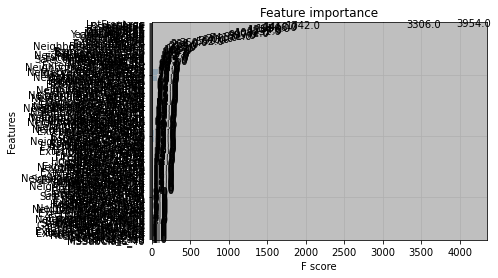

In [81]:
xgb.plot_importance(xg_reg)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ea14ed02-bcf1-4cc9-a95b-a0886626267c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>